## Demo Face Detection and Recognition

### Define imports

In [66]:
import face_recognition
import PIL
import os
import matplotlib.pyplot as plt

%matplotlib inline

### Specification of default/constant settings/configurations

In [67]:
OBAMA_AND_FAMILY = os.path.join(r".\images\Facebook_Images", "two_people.jpg")
OUTPUT_DETECTED_FACES = r".\images\Detected_Images"
OBAMA_CANDIDATE_FACE = os.path.join(r".\images\Candidate_Images", "Obama.jpg")
DETECTED_UNKNOWN_FACES_FILES = ["face-1.jpg", "face-2.jpg"] 

### Routine to detect faces from an input image

In [72]:
def detectFacesInImage(input_path_image, output_dir_faces):
    """
    Detects individual images in an image
    
    Auguments:
    path_of_image -- location of the path of the input image
    
    Returns:
    detected_face_images -- list of detected face images
    """
    # Define list to store the detected images
    detected_face_images = []
    
    # Read/load image from 'JPG' to numpy array
    image = face_recognition.load_image_file(input_path_image)
    print("The input image we will be dtecting faces from is:\n")
    plt.imshow(image)
    plt.title("Original Image")
    plt.show()
    
    # Get the location (top, bottom, left, right) of the faces from the original image
    face_locations = face_recognition.face_locations(image)
    
    print("Found {} faces in the image: {}".format(len(face_locations), input_path_image))
    
    # Define the face counter
    counter = 0
    
    # Now iterate through each face dimension (box) and display/save the detected face images
    for face_location in face_locations:
        
        # Get the dinesion of the face image detected
        top, right, bottom, left = face_location
        print("A face is located at pixel location Top: {}, Left: {}, Bottom: {} and Right: {}".format(top, left, bottom, right))
        
        # Extract the detected face images from the original image and add it to a list
        detected_face_image = image[top:bottom, left:right]
        detected_face_images.append(detected_face_image)
        
        # Convert the extracted face images from numpy array to PIL images
        pil_image = PIL.Image.fromarray(detected_face_image)
        pil_image_copy = pil_image.copy()
        
        # Save the detected imges
        counter += 1
        detected_face_file_name = os.path.join(OUTPUT_DETECTED_FACES, "face-{}.jpg".format(counter))
        pil_image.save(detected_face_file_name)
    
    # Display the detected face images
    displayFaceImages(detected_face_images)
    
    return detected_face_images

def displayFaceImages(detected_face_images, image_captions = None, cmap='gray', cols = 2, fig_size = (10, 10) ):
    """
    """
    plt.figure(figsize=fig_size)  
    i = 1
    
    for j, face_image in enumerate(detected_face_images):
        num_rows = len(detected_face_images)
        if image_captions == None:
            image_file_name = "face-{}".format(j+1)
        else:
            image_file_name = image_captions[j]
        plt.subplot(num_rows, cols, i) 
        plt.title(image_file_name)
        plt.imshow(face_image, cmap=cmap)        
        i += 1     

    plt.show()
    

### Detect faces in the input image

The input image we will be dtecting faces from is:



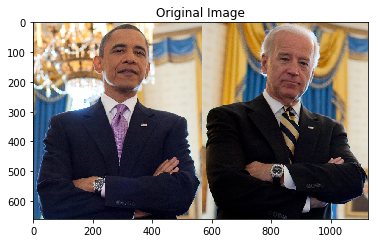

Found 2 faces in the image: .\images\Facebook_Images\two_people.jpg
A face is located at pixel location Top: 57, Left: 778, Bottom: 242 and Right: 964
A face is located at pixel location Top: 47, Left: 253, Bottom: 202 and Right: 408


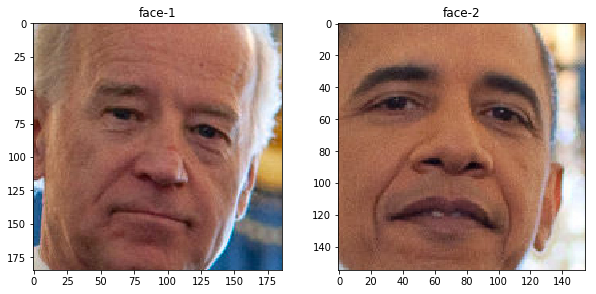

In [73]:
detected_face_images = detectFacesInImage(OBAMA_AND_FAMILY, OUTPUT_DETECTED_FACES)

### Apply face recognition algorithm validate the identity of the detected/extracted face 

In [74]:
def recorgniseIdentityOfFace(path_candidate_face, path_unknown_face):
    """
    """
    # Candidate_fave_encoding now contains a universal 'encoding' of candidate's features 
    # that can be compared to any other picture of a face!
    candidate_face = face_recognition.load_image_file(path_candidate_face)
    candidate_face_encoding = face_recognition.face_encodings(candidate_face)[0]

    # Unknown_face also has an 'encoding' that can be compared with the candidate encoding
    unknown_face = face_recognition.load_image_file(path_unknown_face)
    unknown_face_encoding = face_recognition.face_encodings(unknown_face)[0]
    
    # Encapsulate the face images being compared in a list
    face_images = [candidate_face, unknown_face]
    face_images_file_paths = [path_candidate_face, path_unknown_face]

    # Now we can compare two face encodings and confirm if it is the same person
    results = face_recognition.compare_faces([candidate_face_encoding], unknown_face_encoding)

    print("Comparision b/w face images {} and {} are: \n".format(path_candidate_face, path_unknown_face))
    displayFaceImages(face_images, face_images_file_paths)
        
    if results[0] == True:        
        print("Identity match confirmed!")
    else:
        print("Identity mismatch observed!")


### Recognise the identity of the unknown extracted/detected face

Comparision b/w face images .\images\Candidate_Images\Obama.jpg and .\images\Detected_Images\face-1.jpg are: 



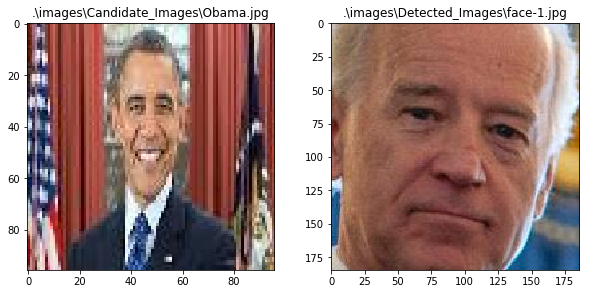

Identity mismatch observed!
Comparision b/w face images .\images\Candidate_Images\Obama.jpg and .\images\Detected_Images\face-2.jpg are: 



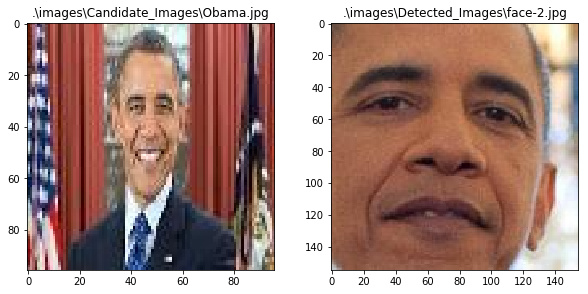

Identity match confirmed!


In [75]:
for unknown_face_file in DETECTED_UNKNOWN_FACES_FILES:
    unknown_face_path = os.path.join(OUTPUT_DETECTED_FACES, unknown_face_file)
    recorgniseIdentityOfFace(OBAMA_CANDIDATE_FACE, unknown_face_path)